In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import astsadata
import sklearn.metrics as sme
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace import sarimax


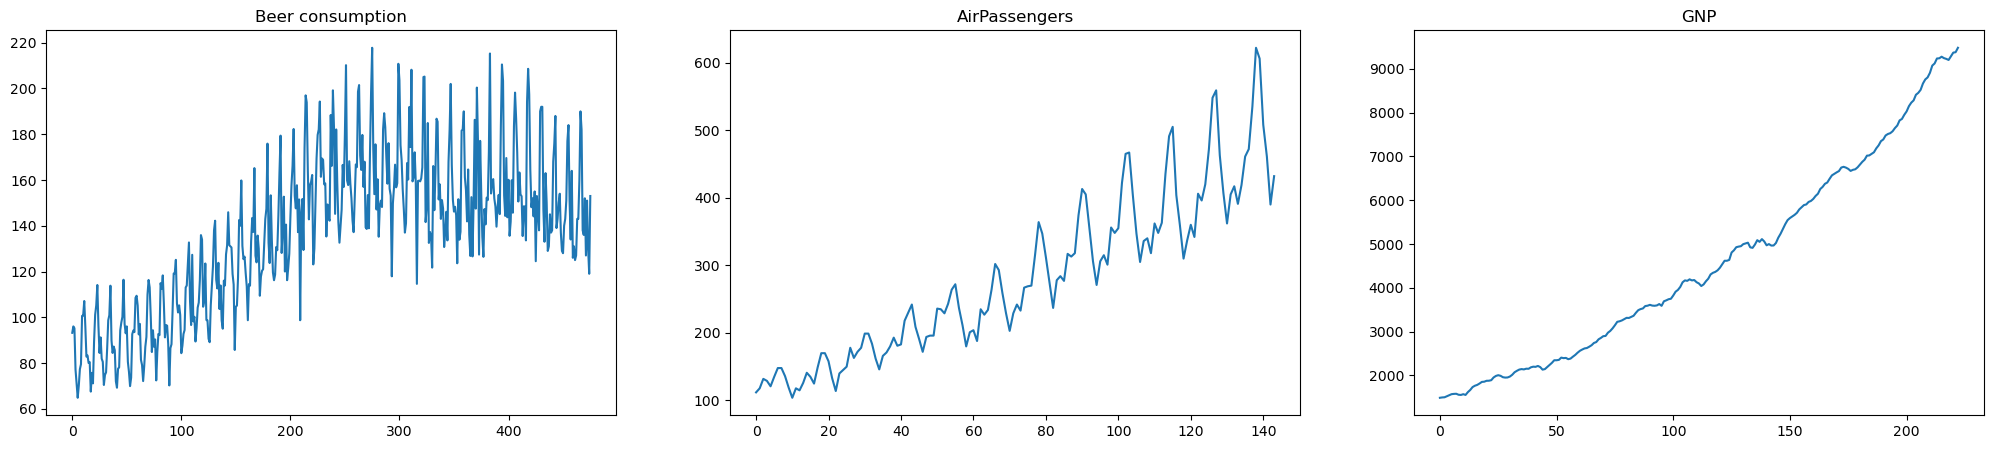

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5)) 

beerproduction = pd.read_csv('monthly-beer-production-in-austr.csv')
plt.subplot(1, 3, 1)
plt.title("Beer consumption") 
plt.plot(beerproduction["Value"])

airpassengers = pd.read_csv('airpassenger.csv')
plt.subplot(1, 3, 2) 
plt.title("AirPassengers") 
plt.plot(airpassengers["#Passengers"]) 

gnp_data = astsadata.gnp 
plt.subplot(1, 3, 3)
plt.title("GNP") 
plt.plot(gnp_data["value"].to_numpy())

In [90]:
beerproduction['Month'] = pd.to_datetime(beerproduction['Month']) 
beerproduction.set_index('Month', inplace=True)
beerproduction.head()

,Value
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<Axes: ylabel='Value'>

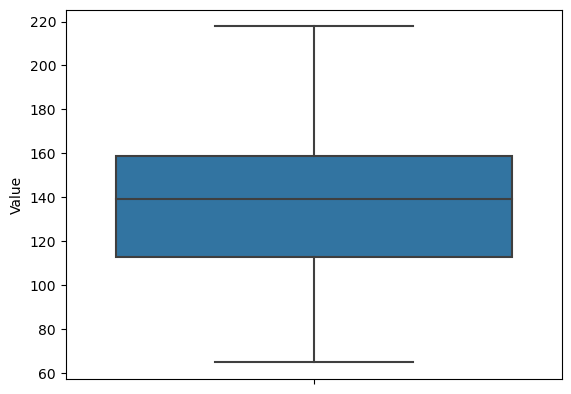

In [91]:
sns.boxplot(y=beerproduction['Value'])

<Figure size 640x480 with 0 Axes>

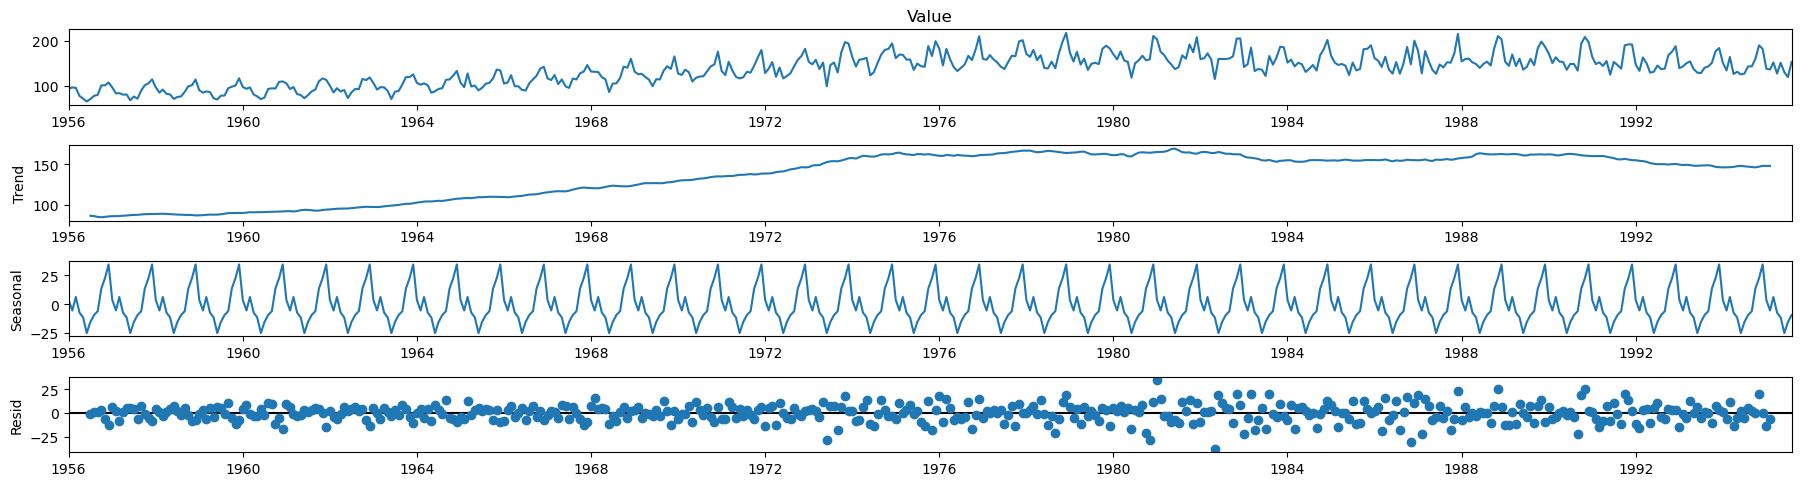

In [92]:
decomposition = seasonal_decompose(beerproduction['Value'])

fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 5)

In [93]:
adf = adfuller(beerproduction['Value'])
print("adf: " + str(adf[0]))
print("p-value: " + str(adf[1]))
print("critical values: " + str(adf[4]))

adf: -2.282661418787579
p-value: 0.17762099829132444
critical values: {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}


/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


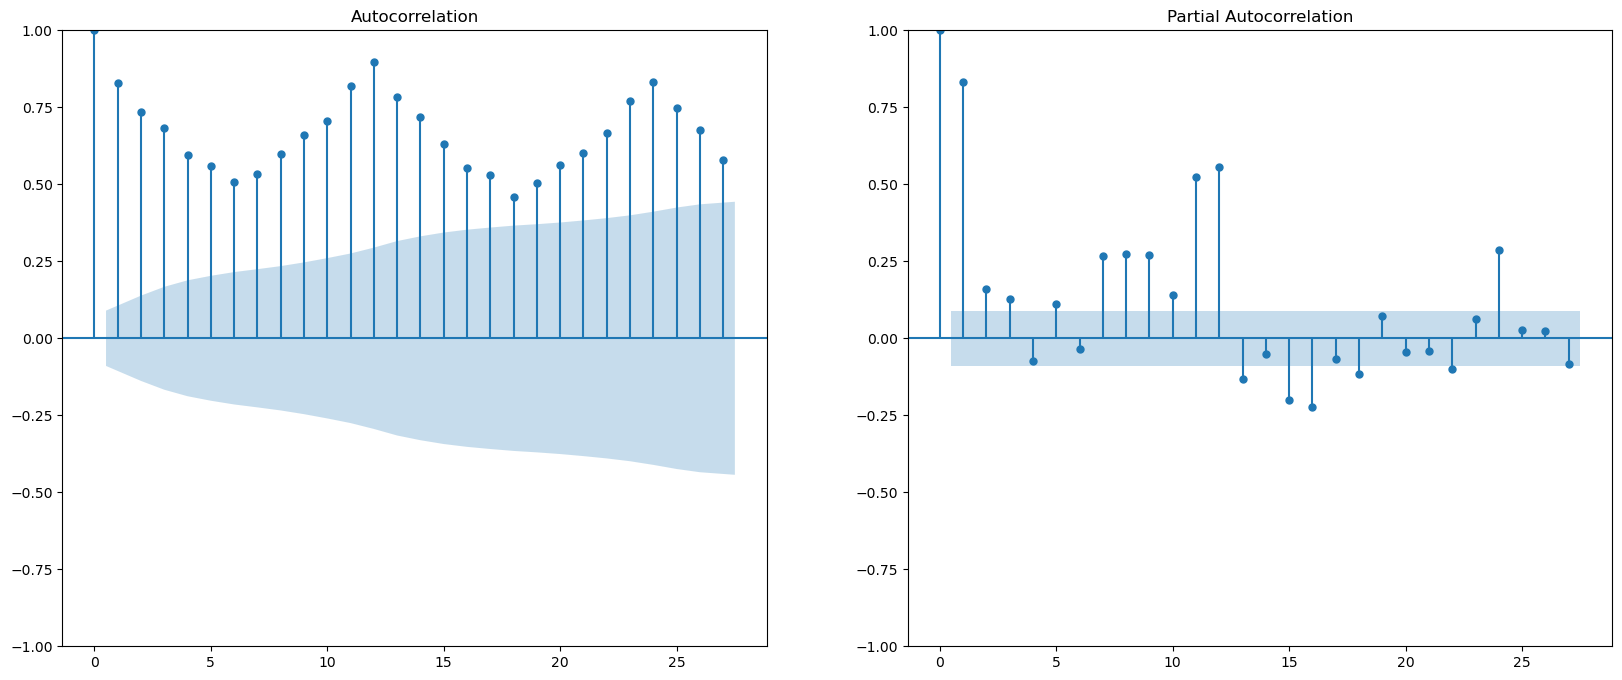

In [94]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
fig = plot_acf(beerproduction, ax=ax[0])
fig = plot_pacf(beerproduction, ax=ax[1])
plt.show()

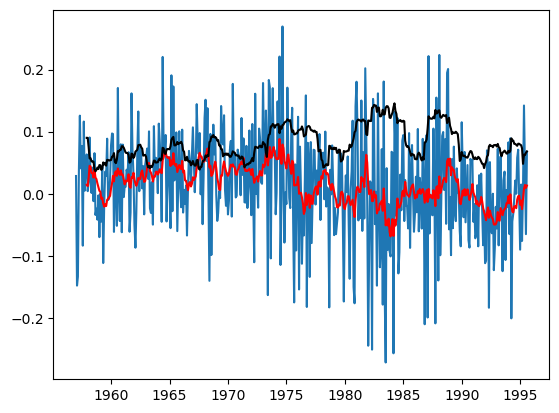

In [109]:
diff0_beerproduction = np.log(beerproduction).diff(periods=12)
diff0_beerproduction.dropna(inplace=True)

diff_beerproduction_avg = diff0_beerproduction.rolling(12).mean() 
diff_beerproduction_std_dev = diff0_beerproduction.rolling(12).std() 
plt.plot(diff0_beerproduction)
plt.plot(diff_beerproduction_avg, color="red") 
plt.plot(diff_beerproduction_std_dev, color ="black") 
plt.show()

In [110]:
adf = adfuller(diff0_beerproduction['Value'])
print("adf: " + str(adf[0]))
print("p-value: " + str(adf[1]))
print("critical values: " + str(adf[4]))

adf: -2.7532981773976752
p-value: 0.06526064719411781
critical values: {'1%': -3.4450973903602367, '5%': -2.868042229965336, '10%': -2.570233448893}


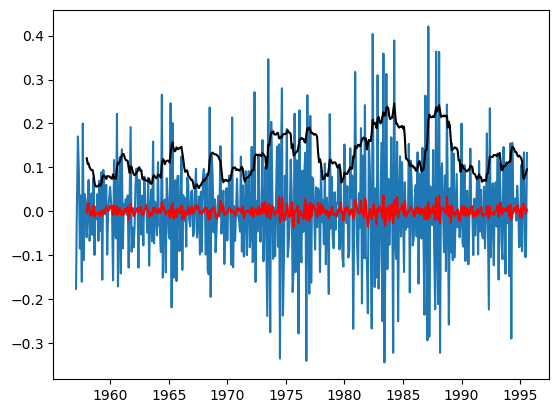

In [99]:
diff_beerproduction = np.log(beerproduction).diff(periods=12).diff()
diff_beerproduction.dropna(inplace=True)

diff_beerproduction_avg = diff_beerproduction.rolling(12).mean() 
diff_beerproduction_std_dev = diff_beerproduction.rolling(12).std() 
plt.plot(diff_beerproduction)
plt.plot(diff_beerproduction_avg, color="red") 
plt.plot(diff_beerproduction_std_dev, color ="black") 
plt.show()

In [100]:
adf = adfuller(diff_beerproduction['Value'])
print("adf: " + str(adf[0]))
print("p-value: " + str(adf[1]))
print("critical values: " + str(adf[4]))

adf: -8.88269844475229
p-value: 1.3049327959650818e-14
critical values: {'1%': -3.4450973903602367, '5%': -2.868042229965336, '10%': -2.570233448893}


/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


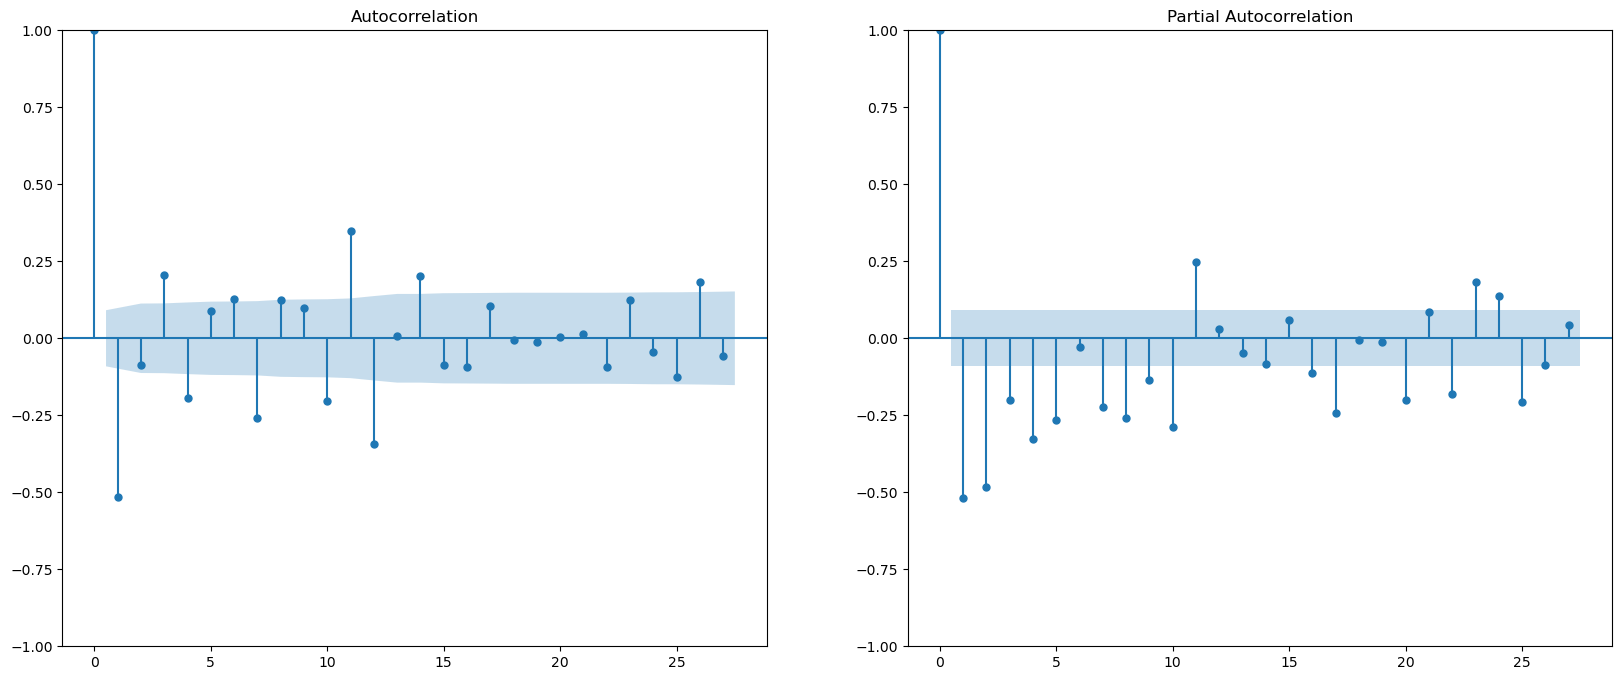

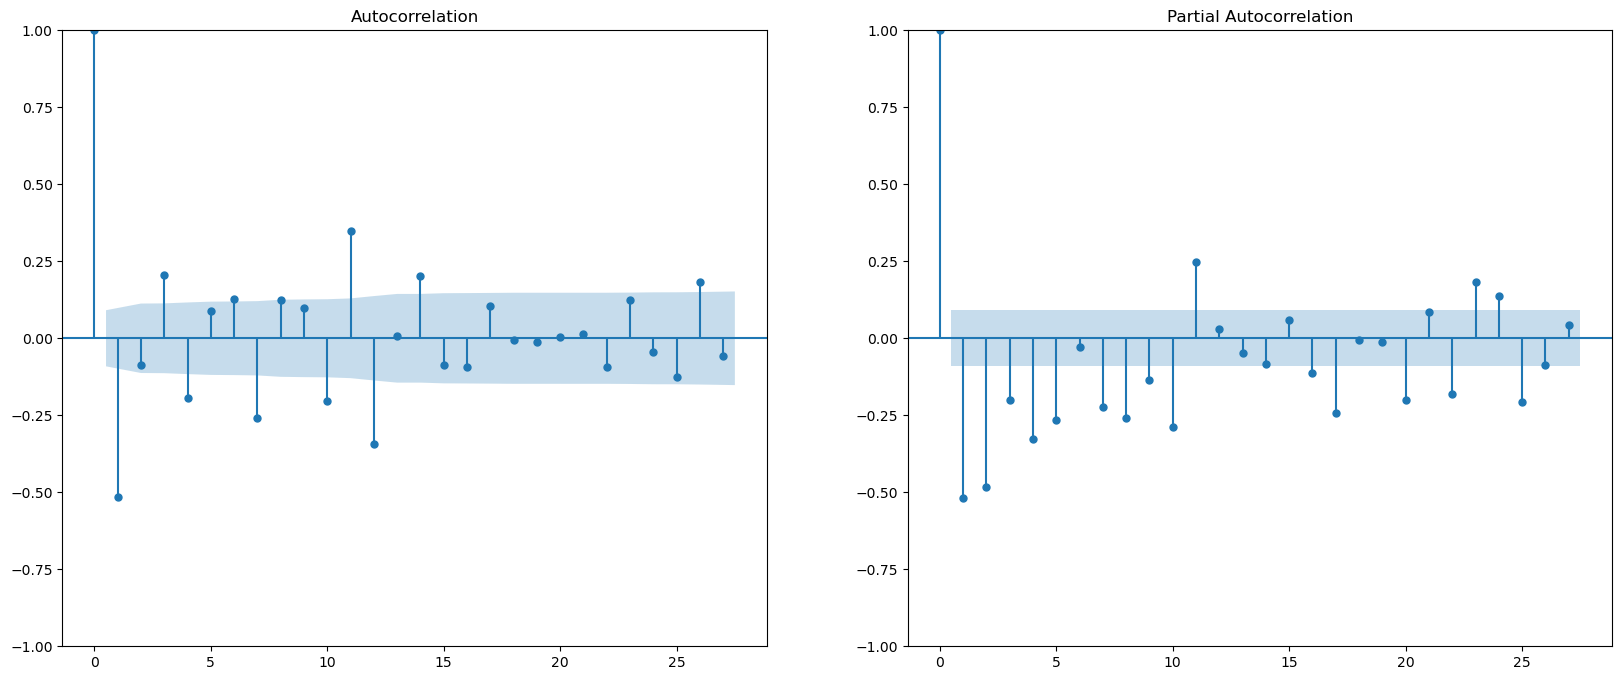

In [104]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8)) 
plot_acf(diff_beerproduction, ax=ax1)
plot_pacf(diff_beerproduction, ax=ax2)

In [105]:
sarima = sarimax.SARIMAX(beerproduction, order=(6,1,3), seasonal_order=(1,1,2,12)).fit()
sarima.summary()

/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is un

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09086D+00    |proj g|=  7.96265D-01

At iterate    5    f=  3.61178D+00    |proj g|=  2.77620D-02

At iterate   10    f=  3.57697D+00    |proj g|=  1.72999D-01

At iterate   15    f=  3.56449D+00    |proj g|=  1.78956D-02

At iterate   20    f=  3.55657D+00    |proj g|=  2.42443D-02

At iterate   25    f=  3.54490D+00    |proj g|=  2.27971D-01

At iterate   30    f=  3.54033D+00    |proj g|=  4.94830D-02

At iterate   35    f=  3.53650D+00    |proj g|=  5.09594D-02

At iterate   40    f=  3.53296D+00    |proj g|=  1.38802D-02

At iterate   45    f=  3.52985D+00    |proj g|=  1.04166D-01


/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.52622D+00    |proj g|=  8.98495D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     54      1     0     0   8.985D-02   3.526D+00
  F =   3.5262194068339849     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   Value   No. Observations:                  476
Model:             SARIMAX(6, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1678.480
Date:                                 Sat, 27 May 2023   AIC                           3382.961
Time:                                         20:24:41   BIC                           3436.751
Sample:                                     01-01-1956   HQIC                          3404.137
                                          - 08-01-1995                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2810      0.065    -19.633      0.000      -1.409      -1.153
ar.L2         -1.3633      0.120    -11.333      0.000      -1.599      -1.128
ar.L3         -0.5360      0.157     -3.407      0.001      -0.844      -0.228
ar.L4         -0.4600      0.141     -3.271      0.001      -0.736      -0.184
ar.L5         -0.2262      0.099     -2.276      0.023      -0.421      -0.031
ar.L6         -0.0697      0.057     -1.220      0.223      -0.182       0.042
ma.L1          0.2931      0.053      5.502      0.000       0.189       0.397
ma.L2          0.0867      0.054      1.614      0.107      -0.019       0.192
ma.L3         -0.7548      0.047    -16.064      0.000      -0.847      -0.663
ar.S.L12      -0.1823      1.731     -0.105      0.916      -3.575       3.210
ma.S.L12      -0.6052      1.717     -0.353      0.724      -3.970       2.759
ma.S.L24      -0.1737      1.379     -0.126      0.900      -2.877       2.530
sigma2        76.8356      4.111     18.691      0.000      68.779      84.893
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.47
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.42   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


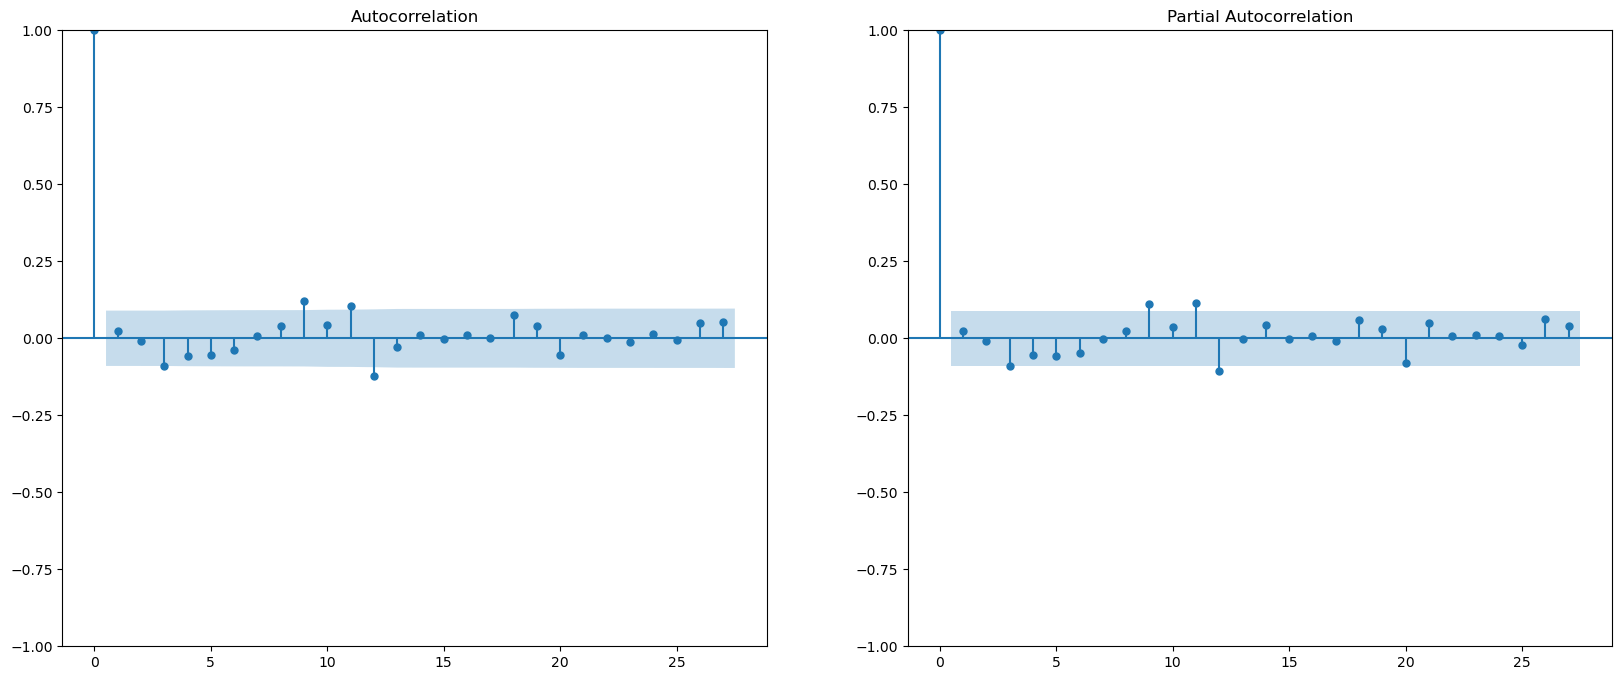

In [106]:
res = sarima.resid
fig,ax = plt.subplots(1,2,figsize=(20,8))
fig = plot_acf(res, ax=ax[0])
fig = plot_pacf(res, ax=ax[1])
plt.show()

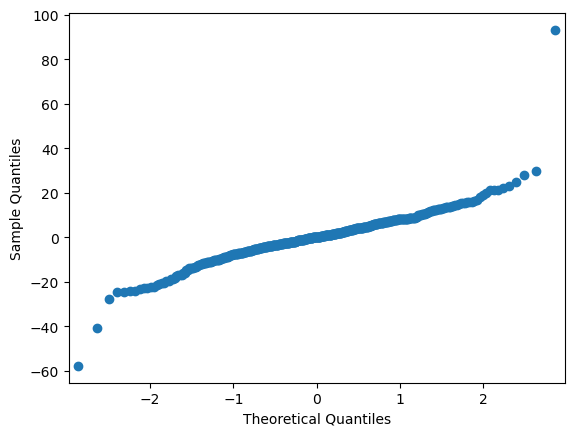

In [107]:
fig = sm.qqplot(sarima.resid)
plt.show()

1995-09-01    130.190381
1995-10-01    163.841514
1995-11-01    186.189889
1995-12-01    177.739723
1996-01-01    147.904407
1996-02-01    140.854227
1996-03-01    145.342325
1996-04-01    139.963137
1996-05-01    139.935667
1996-06-01    117.128236
1996-07-01    134.736946
1996-08-01    141.199654
1996-09-01    128.106093
1996-10-01    169.265958
1996-11-01    179.021350
1996-12-01    177.687937
1997-01-01    151.947900
1997-02-01    133.403946
1997-03-01    146.743864
1997-04-01    142.622175
1997-05-01    132.005543
Freq: MS, Name: predicted_mean, dtype: float64


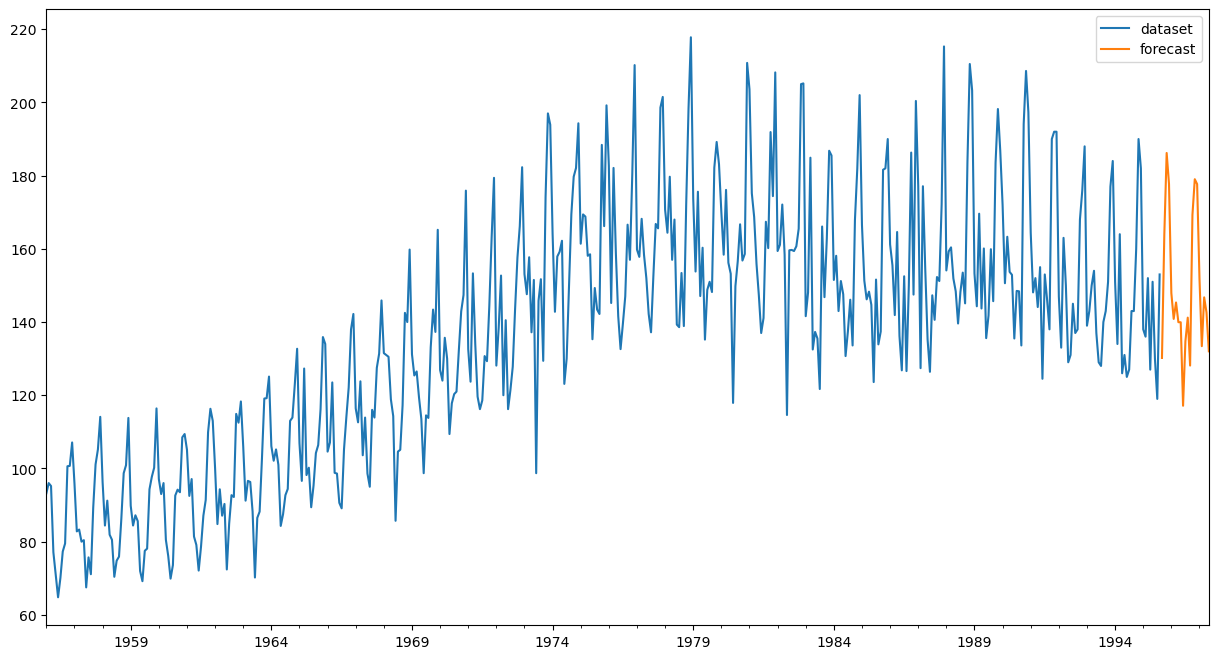

In [108]:
pred_sarima = sarima.predict("1995-09-01", "1997-05-01")
print(pred_sarima)
pd.DataFrame({'dataset':beerproduction['Value'],'forecast':pred_sarima}).plot(figsize=(15,8))
plt.show()

In [68]:
import pmdarima as pm

In [69]:
smodel = pm.auto_arima(beerproduction, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3658.108, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3621.904, Time=0.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3611.751, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3663.880, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=3655.445, Time=0.08 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=3611.487, Time=0.64 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=3621.853, Time=0.29 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=3613.372, Time=1.56 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=3613.446, Time=2.09 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=3611.535, Time=1.07 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=3618.037, Time=0.99 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=3609.808, Time=0.42 sec
 ARIMA(0,0,0)(0,1,1)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  476
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood               -1800.904
Date:                    Sat, 27 May 2023   AIC                           3609.808
Time:                            17:01:24   BIC                           3626.368
Sample:                        01-01-1956   HQIC                          3616.327
                             - 08-01-1995                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4249      0.334      4.267      0.000       0.770       2.080
ar.S.L12       0.1479      0.106      1.393      0.164      -0.060       0.356
ma.S.L12      -0.4911      0.098     -4.987      0.000      -0.684      -0.298
sigma2       137.1169      7.332     18.702      0.000     122.747     151.487
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                42.48
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

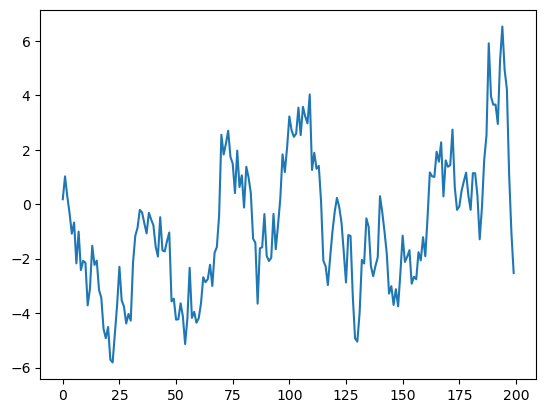

[[0.89647864 0.        ]
 [0.89647864 0.00838642]]
[1.         0.90098356 0.00894445]


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
    

def durbin_levinson(data, p):
    n = len(data)
    mean = np.mean(data)
    sample_moments = np.zeros(p+1)
    phi = np.zeros((p, p))
    v = np.zeros(p)

    for h in range(p+1):
        sum = 0
        for t in range(n-h):
            sum += (data[t+h]-mean) * (data[t]-mean)
        sample_moments[h] = sum / n

    phi[0, 0] = sample_moments[1] / sample_moments[0]
    v[0] = sample_moments[0] * (1 - phi[0, 0] ** 2)

    for n in range(1, p):
        sum = 0
        for k in range(n):
            sum += phi[n-1, k] * sample_moments[n-k]
        phi[n, n] = (sample_moments[n+1] - sum) / v[n-1]
        for k in range(n):
            phi[n, k] = phi[n-1, k] - phi[n, n] * phi[n-1, k-1]
        v[n] = v[n-1] * (1 - phi[n, n]**2)

    return phi


ar_params = np.array([1, -0.9])
ar_series = ArmaProcess(ar_params).generate_sample(nsample=200)
plt.plot(ar_series)
plt.show()

print(durbin_levinson(ar_series, p=2))
print(pacf(ar_series, nlags=2))